In [48]:
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
seaborn.set(style='ticks')

In [49]:
#upload files
city_data = "city_data.csv.txt"
ride_data = "ride_data.csv.txt"

In [50]:
# Read the csv files
city_data =pd.read_csv("city_data.csv.txt")
#city_data1 =city_data.drop(columns=['city'])
#city_data1
#city_data1.head()
ride_data= pd.read_csv("ride_data.csv.txt")
#ride_data.head()


In [86]:
# Combine the datasets
ride_city_df = pd.merge(ride_data, city_data, how="outer", on=['city'])
ride_city_df.head()
# Display the data table

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


Bubble Plot of Ride Sharing Data:
Average Fare ($) Per City
Total Number of Rides Per City
Total Number of Drivers Per City
City Type (Urban, Suburban, Rural)

In [7]:
#city type 1 = Urban
urban_city = (ride_city_df.loc[ride_city_df['type']=="Urban",['city', 'ride_id', 'fare', 'driver_count']])
#x & y axis
x1= urban_city.groupby('city')['ride_id'].count()
y1= urban_city.groupby('city')['fare'].mean()
z1= urban_city.groupby('city')['driver_count'].mean()

#city_type =ride_city_df['type'].value_counts()
#city_type

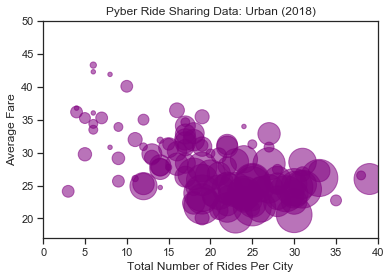

In [64]:
#plot urban 
UC=plt.scatter(x1, y1, marker="o", c="purple", 
            s=z1*20, alpha=0.55)
plt.xlim(0,40)
plt.ylim(17,50)
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare')
plt.title('Pyber Ride Sharing Data: Urban (2018)')
plt.show()

In [84]:
#city type 1 = URBAN
city_type1=ride_city_df['type']=="Urban"
city_type1df=ride_city_df[city_type1]
city_type1df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


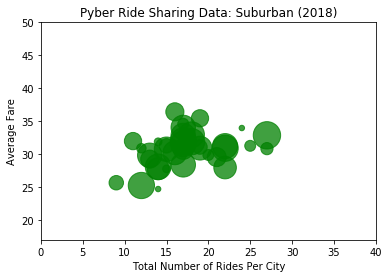

In [10]:
# city type 2 = suburban
city_type2=ride_city_df['type']=="Suburban"
city_type2df=ride_city_df[city_type2]
city_type2df.head()

suburban_city =(ride_city_df.loc[ride_city_df['type']=="Suburban",['city', 'ride_id', 'fare', 'driver_count']])
x2 = suburban_city.groupby('city')['ride_id'].count()
y2 = suburban_city.groupby('city')['fare'].mean()
z2 =suburban_city.groupby('city')['driver_count'].mean()

SC= plt.scatter(x2, y2, marker="o", c="green", s=z2*30, alpha=0.75)
plt.xlim(0,40)
plt.ylim(17,50)
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare')
plt.title('Pyber Ride Sharing Data: Suburban (2018)')
plt.show()

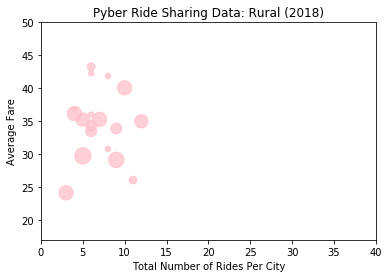

In [11]:
# city type 3 = rural 
city_type3=ride_city_df['type']=="Rural"
city_type3df=ride_city_df[city_type3]
city_type3df.head()

rural_city = (ride_city_df.loc[ride_city_df['type']=="Rural",['city', 'ride_id', 'fare', 'driver_count']])
x3 = rural_city.groupby('city')['ride_id'].count()
y3 = rural_city.groupby('city')['fare'].mean()
z3 =rural_city.groupby('city')['driver_count'].mean()

RC= plt.scatter(x3, y3, marker="o", c="pink", s=z3*30, alpha=0.75)

plt.xlim(0,40)
plt.ylim(17,50)
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare')
plt.title('Pyber Ride Sharing Data: Rural (2018)')
plt.show()

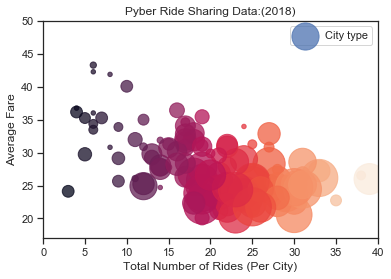

In [96]:
# 
x1= ride_city_df.groupby('city')['ride_id'].count()
y1= ride_city_df.groupby('city')['fare'].mean()
z1= ride_city_df.groupby('city')['driver_count'].mean()
z2= ride_city_df.groupby('city')['type'].count()
#city_type =ride_city_df['type'].value_counts()
#city_type
plt.scatter(x1, y1, c=z2, s=z1*20, alpha=.75, label='City type')

plt.xlim(0,40)
plt.ylim(17,50)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare')
plt.title('Pyber Ride Sharing Data:(2018)')
plt.legend(loc='upper right')

plt.show()


Total Fares by City Type:

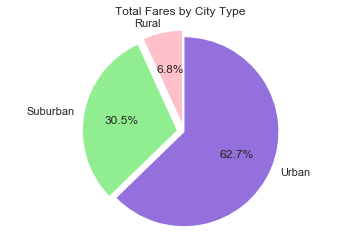

In [113]:
fare_df = ride_city_df.groupby(['type'])['fare'].sum()
labels=["Rural", "Suburban", "Urban"]
colors=["pink", "lightgreen", "mediumpurple"]
sizes=[fare_df]
explode=(0.07,0.07,0)
plt.pie(fare_df, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=False, startangle=90)
plt.title('Total Fares by City Type')
plt.axis('equal')
plt.show()

Total Rides by City Type:

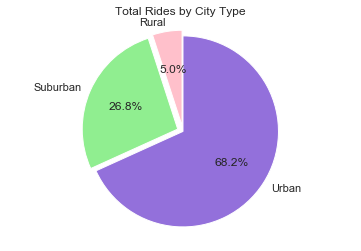

In [114]:
ride_df = ride_city_df.groupby(['type'])['ride_id'].sum()
labels=["Rural", "Suburban", "Urban"]
colors=["pink", "lightgreen", "mediumpurple"]
sizes=[ride_df]
explode=(0.06,0.06,0)
plt.pie(ride_df, explode=explode, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=False, startangle=90)
plt.title('Total Rides by City Type')
plt.axis('equal')
plt.show()

Total Drivers by City Type:

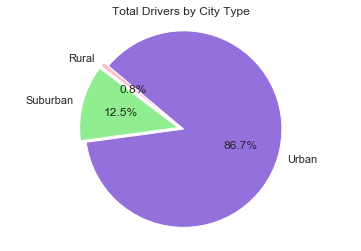

In [115]:
driver_df=ride_city_df.groupby(['type'])['driver_count'].sum()
labels = ["Rural", "Suburban", "Urban"]
sizes = [driver_df]
colors=["pink", "lightgreen", "mediumpurple"]
explode = (0.06, 0.06, 0)
plt.pie(driver_df, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.title('Total Drivers by City Type')
plt.axis('equal')
plt.show()